Nama  : Tamara Agyan Putri
NIM   : 202201015
Prodi : Sistem Informasi (A)
Tugas : Data Mining Klasifikasi K-Nearest Neighbor

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
data = pd.read_csv('diabetes.csv')

In [14]:
# Ambil fitur Glucose (kolom ke-1) dan BMI (kolom ke-5)
x = data.iloc[:, [1, 5]].values

# Target tetap kolom terakhir (Outcome)
y = data.iloc[:, -1].values

In [15]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
print (x)

[[148.   33.6]
 [ 85.   26.6]
 [183.   23.3]
 ...
 [121.   26.2]
 [126.   30.1]
 [ 93.   30.4]]


In [17]:
len (x)

768

In [18]:
print (y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [19]:
len (y)

768

In [20]:
# Split data training & testing
from sklearn.model_selection import train_test_split
x_latih, x_tes, y_latih, y_tes = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [21]:
print (x_latih)

[[ 84.    0. ]
 [112.   28.2]
 [139.   28.7]
 ...
 [101.   45.6]
 [141.   42.4]
 [125.   22.5]]


In [22]:
len (x_latih)

614

In [ ]:
print (x_tes)

In [24]:
len (x_tes)

154

In [25]:
print (y_latih)

[0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 

In [26]:
len (y_latih)

614

In [27]:
print (y_tes)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]


In [28]:
len (y_tes)

154

In [29]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_latih = std.fit_transform(x_latih)
x_tes = std.transform(x_tes)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifier.fit(x_latih, y_latih)

KNeighborsClassifier(metric='euclidean')

In [31]:
y_prediksi = classifier.predict(x_tes)

In [32]:
from sklearn.metrics import confusion_matrix
hasil_cm = confusion_matrix(y_tes, y_prediksi)
print (hasil_cm)

[[84 15]
 [23 32]]


<ipython-input-37-5e2cfa2b4012>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


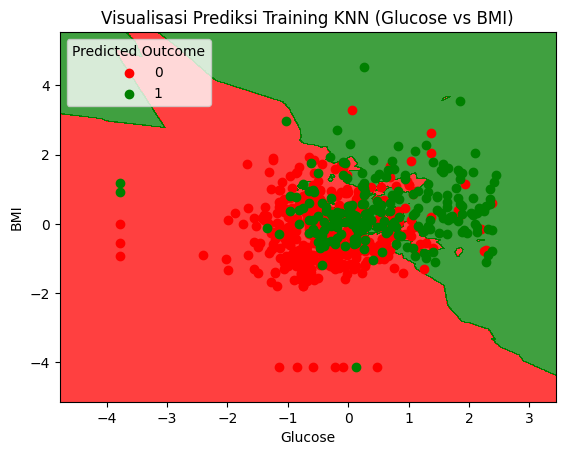

In [37]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_latih, y_latih
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
  # Reshape y_set to be 1-dimensional for proper indexing
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
              c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('Visualisasi Prediksi Training KNN (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Predicted Outcome')
plt.show()

<ipython-input-35-7991798494f1>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],


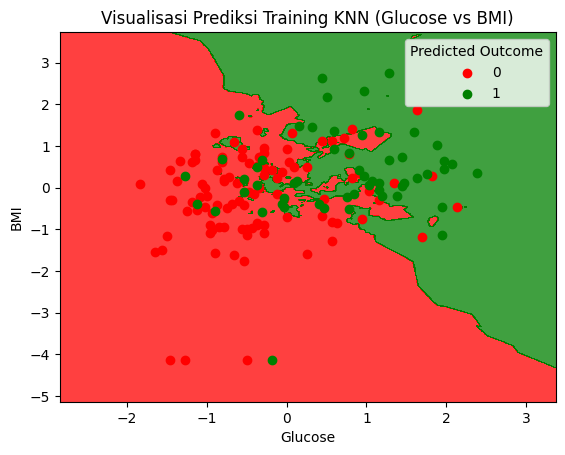

In [35]:
from matplotlib.colors import ListedColormap
x_data, y_data = x_tes, y_tes
x_one, x_two = np.meshgrid(np.arange(start = x_data[:, 0].min() - 1, stop = x_data[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_data[:, 1].min() - 1, stop = x_data[:, 1].max() + 1, step = 0.01))
plt.contourf(x_one, x_two, classifier.predict(np.array([x_one.ravel(), x_two.ravel()]).T).reshape(x_one.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x_one.min(), x_one.max())
plt.ylim(x_two.min(), x_two.max())
for g, h in enumerate(np.unique(y_tes)):
  # Reshape y_set to be 1-dimensional for proper indexing
  plt.scatter(x_data[y_data == h, 0], x_data[y_data == h, 1],
              c = ListedColormap(('red', 'green'))(g), label = h)
plt.title('Visualisasi Prediksi Training KNN (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Predicted Outcome')
plt.show()

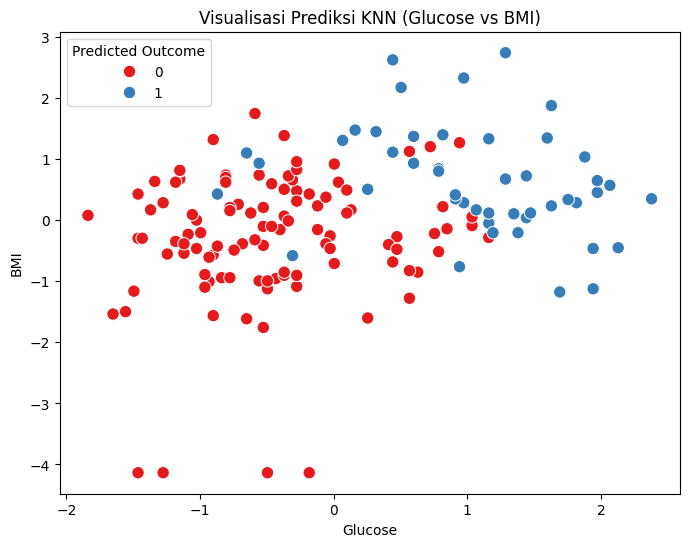

In [55]:
# === Visualisasi Fitur 2D ===
plt.figure(figsize=(8,6))

# Karena x_tes adalah array, pakai index [:,0] dan [:,1]
sns.scatterplot(x = x_tes[:, 0], y = x_tes[:, 1], hue = y_prediksi, palette='Set1', s=80)

plt.title('Visualisasi Prediksi KNN (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.legend(title='Predicted Outcome')
plt.show()

Alasan memilih Glucose & BMI:

- Glucose:
Kadar gula darah sangat berhubungan langsung dengan kemungkinan seseorang mengidap diabetes.
Penderita diabetes biasanya punya kadar glucose tinggi.

- BMI:
Obesitas (BMI tinggi) adalah salah satu faktor risiko terbesar diabetes tipe 2.
Semakin tinggi BMI, semakin tinggi kemungkinan mengalami diabetes.

- Kenapa Outcome menjadi Prediksi?
0 → Tidak diabetes  
1 → Diabetes
Artinya label target → klasifikasi biner.
Tujuan Data Mining dalam kasus ini adalah memprediksi apakah seseorang diabetes atau tidak, berdasarkan fitur-fitur input (X).


In [56]:
# Akurasi
print("Accuracy Score:", accuracy_score(y_tes, y_prediksi))

Accuracy Score: 0.7532467532467533


0,75 termasuk akurasi range normal

Kekurangan K-NN untuk kasus ini
K-NN adalah metode yang sangat sederhana & intuitif.
Namun ada kekurangan:

1. Sensitif ke skala fitur

Kalau fitur tidak diskalakan (contoh Glucose 100+, BMI 20-50), K-NN bisa bias → maka biasanya feature scaling (StandardScaler) dibutuhkan.

2. Computational cost → lambat kalau dataset besar, karena menghitung jarak ke semua data.

3. Tidak memberikan insight hubungan antar fitur (seperti decision tree atau logistic regression).

4. Dipengaruhi outlier → outlier bisa membuat prediksi meleset.